In [4]:
!sudo apt-get install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 0s (1,194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Read

In [5]:
pip install pyzbar 

In [6]:
pip install opencv-python

In [7]:
pip install opencv-contrib-python

3.4.3


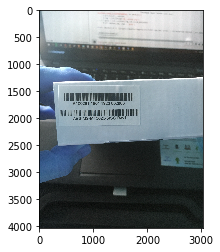

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
print(cv2.__version__)
img = cv2.imread('IMG_5647.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

In [0]:
from pyzbar.pyzbar import decode
from PIL import Image

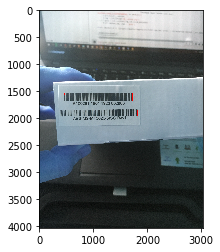

In [10]:
for code in decode(img):
    points = code.polygon
    # If the points do not form a quad, find convex hull
    if len(points) > 4 : 
        hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
        hull = list(map(tuple, np.squeeze(hull)))
    else : 
        hull = points
    # Number of points in the convex hull
    n = len(hull)     
    # Draw the convext hull
    for j in range(0,n):
        cv2.line(img, hull[j], hull[ (j+1) % n], (255,0,0), 3)
        
plt.imshow(img, cmap = 'gray')

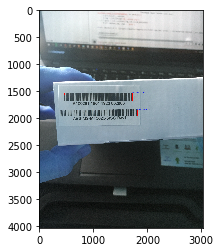

In [11]:
for code in decode(img):
    x = code.rect.left
    y = code.rect.top
    barCode = str(code.data)
    cv2.putText(img, barCode, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
            
plt.imshow(img, cmap = 'gray')

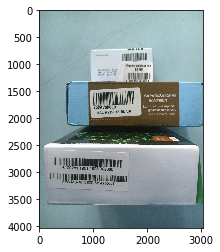

In [26]:
img = cv2.imread('IMG_5648.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

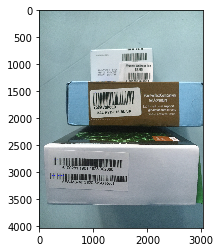

In [27]:
for code in decode(img):
    x = code.rect.left
    y = code.rect.top
    barCode = str(code.data)
    cv2.putText(img, barCode, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
            
plt.imshow(img, cmap = 'gray')

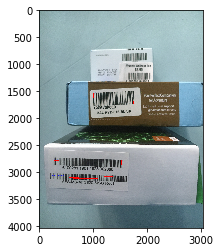

In [28]:
for code in decode(img):
    points = code.polygon
    # If the points do not form a quad, find convex hull
    if len(points) > 4 : 
        hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
        hull = list(map(tuple, np.squeeze(hull)))
    else : 
        hull = points
    # Number of points in the convex hull
    n = len(hull)     
    # Draw the convext hull
    for j in range(0,n):
        cv2.line(img, hull[j], hull[ (j+1) % n], (255,0,0), 3)
        
plt.imshow(img, cmap = 'gray')

In [0]:
image = cv2.imread('barcode.jpg')

In [41]:
image.shape

(864, 1152, 3)

In [0]:
from pyzbar import pyzbar
barcodes = pyzbar.decode(image)

[INFO] Found CODE128 barcode: AC1201
[INFO] Found CODE128 barcode: AC1202
[INFO] Found CODE128 barcode: AC1204
[INFO] Found CODE128 barcode: AC1205


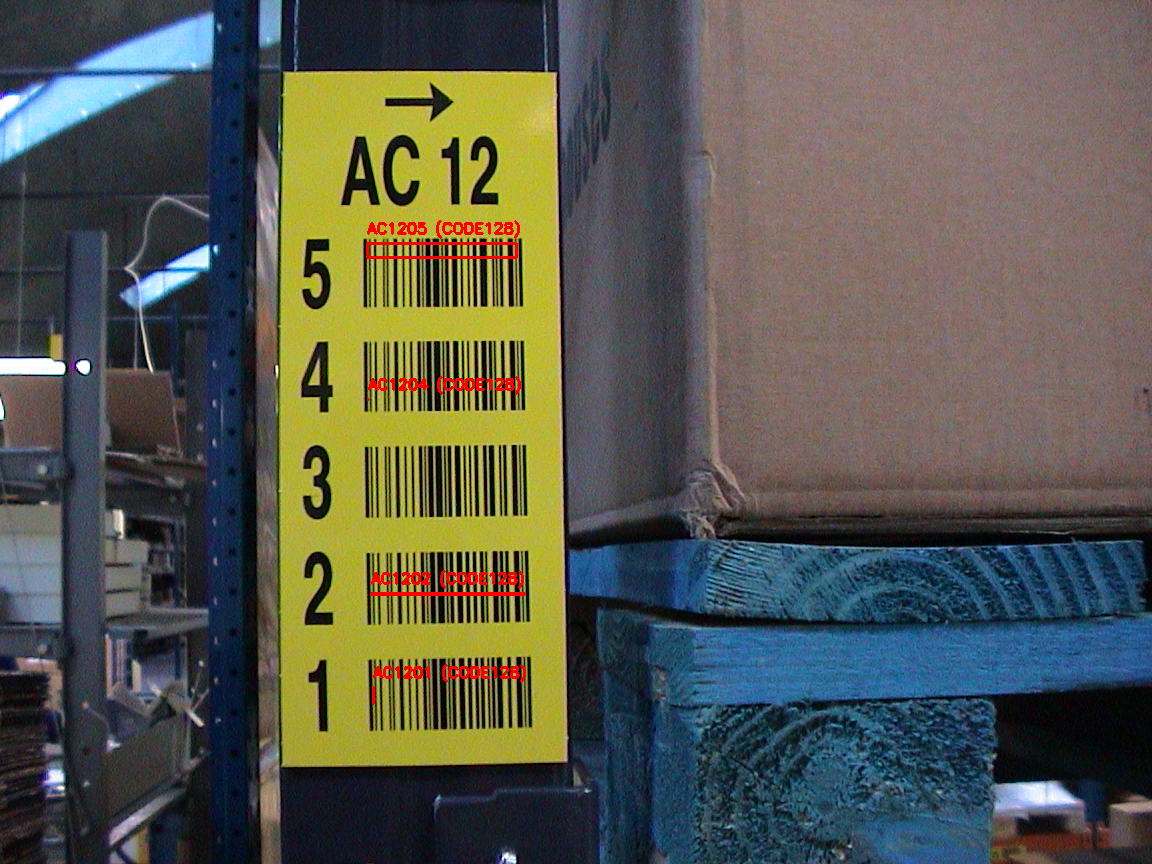

In [43]:
from google.colab.patches import cv2_imshow

# loop over the detected barcodes
for barcode in barcodes:
	# extract the bounding box location of the barcode and draw the
	# bounding box surrounding the barcode on the image
	(x, y, w, h) = barcode.rect
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
	# the barcode data is a bytes object so if we want to draw it on
	# our output image we need to convert it to a string first
	barcodeData = barcode.data.decode("utf-8")
	barcodeType = barcode.type
 
	# draw the barcode data and barcode type on the image
	text = "{} ({})".format(barcodeData, barcodeType)
	cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (0, 0, 255), 2)
 
	# print the barcode type and data to the terminal
	print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))
 
# show the output image
#cv2.imshow("Image", image)
cv2_imshow(image)
#cv2.waitKey(0)